In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

### Linear

In [140]:
def approxLinear(X, Y):
  return np.linalg.lstsq(X, Y, rcond=None)[0].T

### Nonlinear

In [ ]:
# TODO: base should be a callable function

In [234]:
def radialFunction(center, X, eps):
  return np.exp(-euclidean_distances(X, [center]) ** 2 / eps ** 2)

In [235]:
def radialBase(num_basis, X):
  centers = np.random.RandomState(seed=42).permutation(len(X))[:num_basis]
  return X[centers]

In [241]:
def radialBasis(base, X, eps):
  test = []
  for center in base:
    test.append(radialFunction(center, X, eps))
  test = np.asarray(test)
  return test.T[0]

In [246]:
def approxNonLinear(X, Y, num_basis, eps):
  
  base = radialBase(num_basis, X)
  radial_functions = radialBasis(base, X, eps)

  return np.linalg.lstsq(radial_functions, Y, rcond=None)[0].T, base

Affine Maps are ignored!! b = 0, hence only consider Ax = y

# Task 1
---

In [ ]:
def loadData(filename):
  with open(f'{filename}.txt', 'r') as f:
    data = np.loadtxt(f)
  
    X = data[:, 0].reshape(-1, 1)
    Y = data[:, 1].reshape(-1, 1)
    return X, Y

In [ ]:
def plotData(X, Y, fitted):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.plot(X, Y, 'o', label='Original data', markersize=5)
  ax.plot(X, X @ fitted, 'r', label='Fitted line')
  ax.set_xlabel('x')
  ax.set_ylabel('y')

  plt.legend()
  plt.show()

### First part
---

In [ ]:
X_part1, Y_part1 = loadData('linear_function_data')

In [ ]:
fitted_part1 = approxLinear(X_part1, Y_part1)

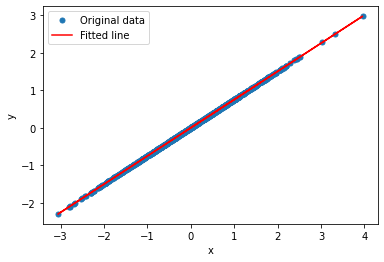

In [ ]:
plotData(X_part1, Y_part1, fitted_part1)

### Second part
---

In [201]:
X_part2, Y_part2 = loadData('nonlinear_function_data')

In [204]:
fitted_part2 = approxLinear(X_part2, Y_part2)

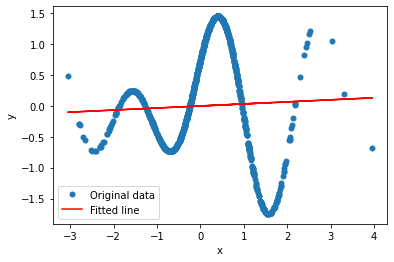

In [205]:
plotData(X_part2, Y_part2, fitted_part2)

### Third part
---

In [262]:
X_part3, Y_part3 = loadData('nonlinear_function_data')

In [295]:
eps_part3 = 2
coeff, base = approxNonLinear(X_part3, Y_part3, 12, eps_part3)

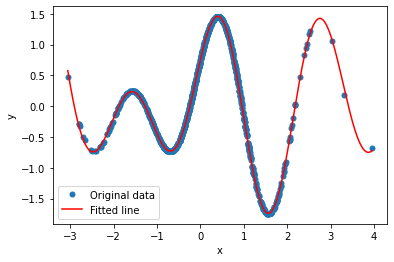

In [296]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X_part3, Y_part3, 'o', label='Original data', markersize=5)

plotting = np.linspace(min(X_part3), max(X_part3), 10000)
ax.plot(plotting, radialBasis(base, plotting.reshape(-1, 1), eps_part3) @ coeff.T, 'r', label='Fitted line')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend()
plt.show()

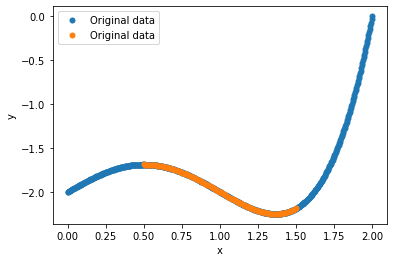

In [297]:
'''
Some random tests
can be ignored, only important for testing and understanding the implementation
'''



x=np.linspace(0, 2, 500)
y = x**4 - 2 * x ** 3 + x - 2

num_basis = 3
base = radialBase(num_basis, x.reshape(-1, 1))

test = radialBasis(base, x.reshape(-1, 1), 0.1)
coeff, base = approxNonLinear(x.reshape(-1, 1), y.reshape(-1, 1), 50, 0.5)


fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x, y, 'o', label='Original data', markersize=5)
#for i in range(num_basis):
  #ax.plot(x, test[:, i], 'o', label='Original data', markersize=5)  
#ax.plot(x, radialFunction([0.3], x.reshape(-1, 1), 0.1), 'o', label='Original data', markersize=5)
#ax.plot(X, X @ fitted, 'r', label='Fitted line')
lin = np.linspace(0.5, 1.5, 100)
ax.plot(lin, radialBasis(base, lin.reshape(-1, 1), 0.5) @ coeff.T, 'o', label='Original data', markersize=5)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend()
plt.show()

#print(radialFunction([0.3], x.reshape(-1, 1), 0.1).shape)